In [1]:
from math import pi
state=input('Enter the binary bit string you would like to compute the Fourier transform of ')
n=len(state)
x = int(state, 2)
print(x)

Enter the binary bit string you would like to compute the Fourier transform of 1011
11


In [2]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
qc=QuantumCircuit(n)
qc1=QuantumCircuit(n)

In [3]:
for i in range(n):
    if state[i]=='1':
        qc.x(i)
        qc1.x(i)
qc1.draw()      

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     └───┘

In [4]:
def qft_circuit(quantumcircuit,m):
    if m==0:
        return quantumcircuit
  
    m=m-1
    quantumcircuit.h(m)
    for qbit in range(m):
        quantumcircuit.cp(pi/2**(m-qbit),qbit,m)
    qft_circuit(quantumcircuit,m)

In [5]:
def bit_swap(quantumcircuit,m):
    for qbit in range(m//2):
        quantumcircuit.swap(qbit,m-1-qbit)

In [6]:
def qft(quantumcircuit,m):
    qft_circuit(quantumcircuit,m)
    bit_swap(quantumcircuit,m)
    return quantumcircuit

In [7]:
qft(qc,n)

In [8]:
n

4

In [9]:
qc.draw()

┌───┐                                                                     »
q_0: ┤ X ├──────■───────────────────────────────■──────────────────────■───────»
     └───┘      │                               │                ┌───┐ │P(π/2) »
q_1: ───────────┼────────■──────────────────────┼────────■───────┤ H ├─■───────»
     ┌───┐      │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘         »
q_2: ┤ X ├──────┼────────┼────────■───────┤ H ├─■────────■─────────────────────»
     ├───┤┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                »
q_3: ┤ X ├┤ H ├─■────────■────────■────────────────────────────────────────────»
     └───┘└───┘                                                                »
«     ┌───┐   
«q_0: ┤ H ├─X─
«     └───┘ │ 
«q_1: ──X───┼─
«       │   │ 
«q_2: ──X───┼─
«           │ 
«q_3: ──────X─
«

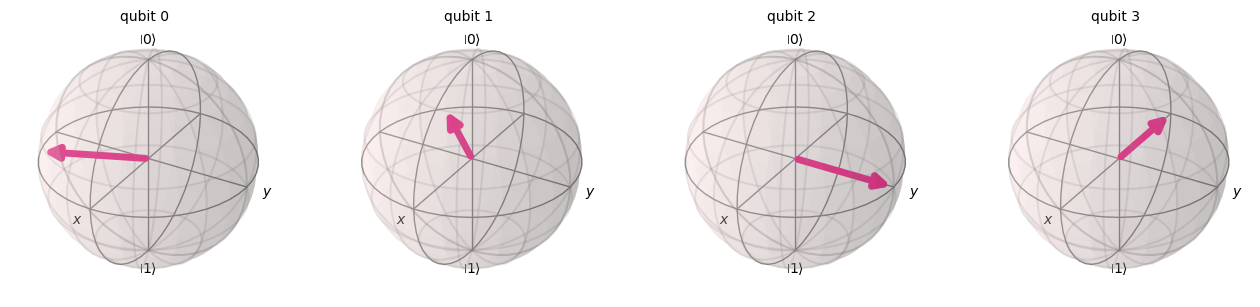

In [10]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
psi=Statevector(qc)
plot_bloch_multivector(psi)

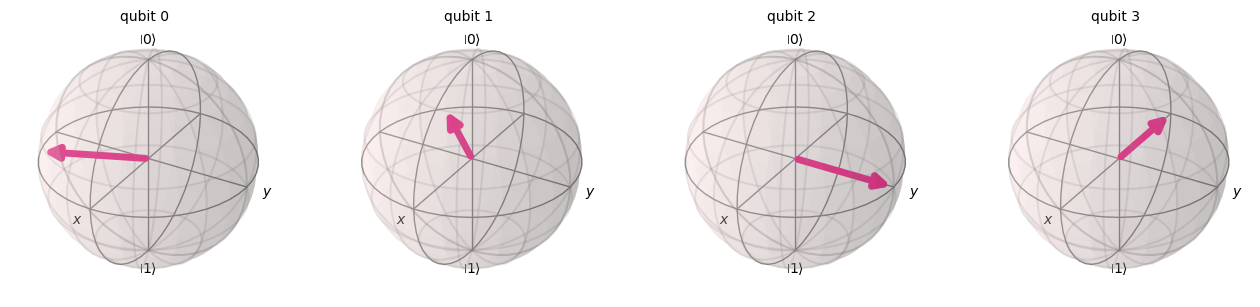

In [11]:
from qiskit.circuit.library import QFT
qft= QFT(num_qubits=n)
qc1=qc1.compose(qft)

psi1=Statevector(qc1)
plot_bloch_multivector(psi1)

In [12]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend= QasmSimulator()
qc_compiled = transpile(qc,backend)
job= backend.run(qc_compiled, shots= 1024)
result=job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

QiskitError: 'No counts for experiment "0"'

In [ ]:
service.b